In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [5]:
input_shape = (224, 224, 3)

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

In [8]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'Finalv3/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    'Finalv3/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

val_generator = test_datagen.flow_from_directory(
    'Finalv3/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

Found 11590 images belonging to 2 classes.
Found 1449 images belonging to 2 classes.
Found 1450 images belonging to 2 classes.


In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples/val_generator.batch_size
)

Epoch 1/10
362/362 [==============================] - 89s 220ms/step - loss: 0.6081 - accuracy: 0.6524 - val_loss: 0.4925 - val_accuracy: 0.7724
Epoch 2/10
362/362 [==============================] - 27s 74ms/step - loss: 0.4763 - accuracy: 0.7779 - val_loss: 0.4354 - val_accuracy: 0.7979
Epoch 3/10
362/362 [==============================] - 27s 76ms/step - loss: 0.4139 - accuracy: 0.8179 - val_loss: 0.3705 - val_accuracy: 0.8407
Epoch 4/10
362/362 [==============================] - 29s 79ms/step - loss: 0.3663 - accuracy: 0.8451 - val_loss: 0.3708 - val_accuracy: 0.8331
Epoch 5/10
362/362 [==============================] - 29s 80ms/step - loss: 0.3403 - accuracy: 0.8575 - val_loss: 0.3006 - val_accuracy: 0.8807
Epoch 6/10
362/362 [==============================] - 30s 82ms/step - loss: 0.3162 - accuracy: 0.8699 - val_loss: 0.3551 - val_accuracy: 0.8510
Epoch 7/10
362/362 [==============================] - 29s 81ms/step - loss: 0.2943 - accuracy: 0.8807 - val_loss: 0.2737 - val_accuracy

In [12]:
test_loss, test_acc = model.evaluate(
    test_generator,
    steps=test_generator.samples/test_generator.batch_size
)

45/45 [==============================] - 10s 219ms/step - loss: 0.2590 - accuracy: 0.8992


In [13]:
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.8992408514022827


In [14]:
# Save the model
model.save('deepfake_detection_model.h5')

46/46 [==============================] - 3s 58ms/step


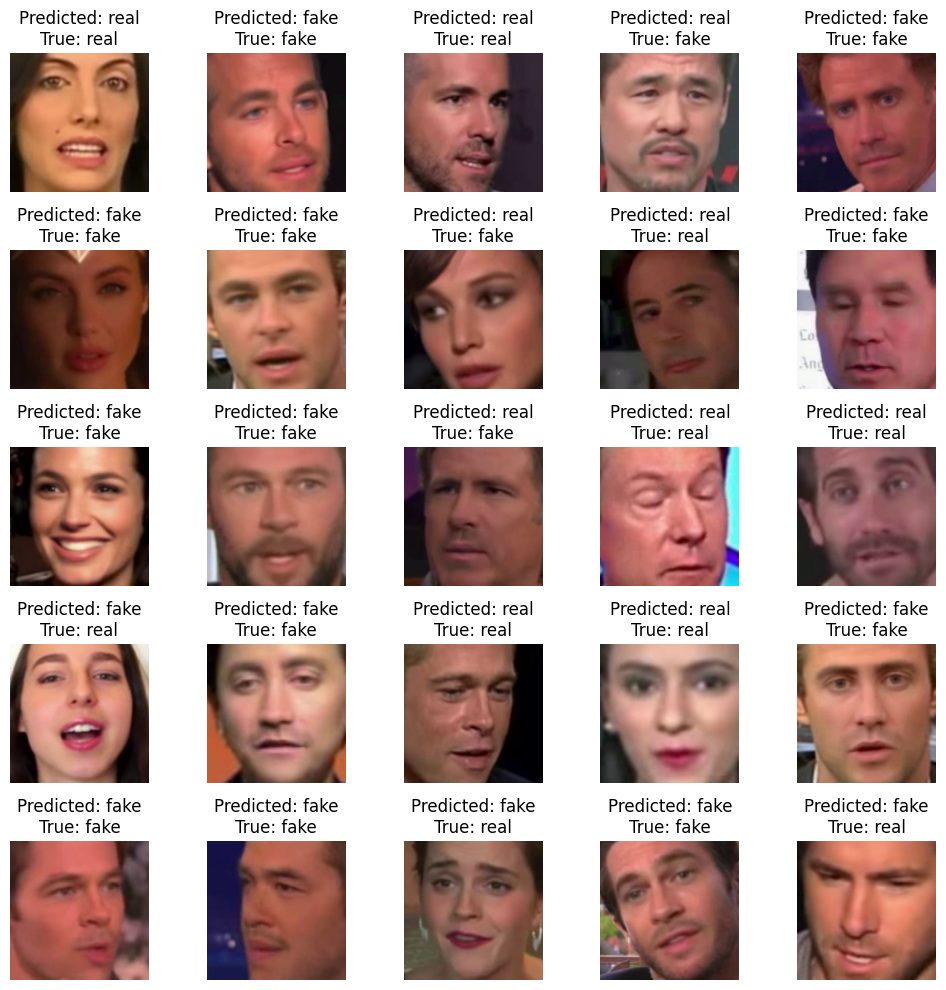

In [25]:
# import matplotlib.pyplot as plt

# # Load the saved model
# model = tf.keras.models.load_model('deepfake_detection_model.h5')

# # Get the class indices for the generator
# class_indices = train_generator.class_indices

# # Get class labels
# class_labels = list(class_indices.keys())

# # Evaluate the model on the test data and get predictions
# test_generator.reset()  # Reset the generator to the beginning
# predictions = model.predict(test_generator)

# # Display the test dataset with predictions
# plt.figure(figsize=(10, 10))
# num_images = 25  # Number of images to display
# for i in range(num_images):
#     # Get the next image and its label
#     image, label = test_generator.next()
#     # Make predictions
#     prediction = predictions[i][0]
#     predicted_label = 'Fake' if prediction > 0.5 else 'Real'
#     true_label = 'Fake' if label[0] > 0.5 else 'Real'

#     # Display the image with its true and predicted labels
#     plt.subplot(5, 5, i + 1)
#     plt.imshow(image[0])
#     plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')
#     plt.axis('off')

# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('deepfake_detection_model.h5')

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Evaluate the model on the test data and get predictions
test_generator.reset()  # Reset the generator to the beginning
predictions = model.predict(test_generator)

# Display the test dataset with predictions
plt.figure(figsize=(10, 10))
num_images = 25  # Number of images to display
for i in range(num_images):
    # Get the next image and its label
    image, label = test_generator.next()
    # Make predictions
    prediction = predictions[i][0]
    predicted_label = class_labels[int(round(prediction))]
    true_label = class_labels[int(label[0])]  # Convert label to integer

    # Display the image with its true and predicted labels
    plt.subplot(5, 5, i + 1)
    plt.imshow(image[0])
    plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

